In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('Medicalpremium.csv')

In [3]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [4]:
df.tail()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000
985,21,0,0,0,0,158,75,1,0,1,15000


In [5]:
df.shape

(986, 11)

In [6]:
df.isna().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [7]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [10]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [11]:
df.corr()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
Age,1.000000,0.210908,0.244888,-0.008549,0.051072,0.039879,-0.018590,-0.024416,-0.027623,0.429181,0.697540
Diabetes,0.210908,1.000000,0.127727,-0.036652,-0.089428,-0.003783,-0.024563,-0.080102,-0.055527,0.122722,0.076209
BloodPressureProblems,0.244888,0.127727,1.000000,-0.024538,0.045424,-0.037926,-0.061016,-0.011550,0.048239,0.251568,0.167097
AnyTransplants,-0.008549,-0.036652,-0.024538,1.000000,0.035285,-0.031543,0.002087,0.001876,-0.020171,-0.004154,0.289056
AnyChronicDiseases,0.051072,-0.089428,0.045424,0.035285,1.000000,0.047419,-0.033318,-0.027418,0.008666,0.014835,0.208610
Height,0.039879,-0.003783,-0.037926,-0.031543,0.047419,1.000000,0.066946,-0.010200,0.010549,0.037289,0.026910
Weight,-0.018590,-0.024563,-0.061016,0.002087,-0.033318,0.066946,1.000000,0.037492,0.003481,-0.006108,0.141507
KnownAllergies,-0.024416,-0.080102,-0.011550,0.001876,-0.027418,-0.010200,0.037492,1.000000,0.115383,0.103923,0.012103
HistoryOfCancerInFamily,-0.027623,-0.055527,0.048239,-0.020171,0.008666,0.010549,0.003481,0.115383,1.000000,0.212657,0.083139
NumberOfMajorSurgeries,0.429181,0.122722,0.251568,-0.004154,0.014835,0.037289,-0.006108,0.103923,0.212657,1.000000,0.264250


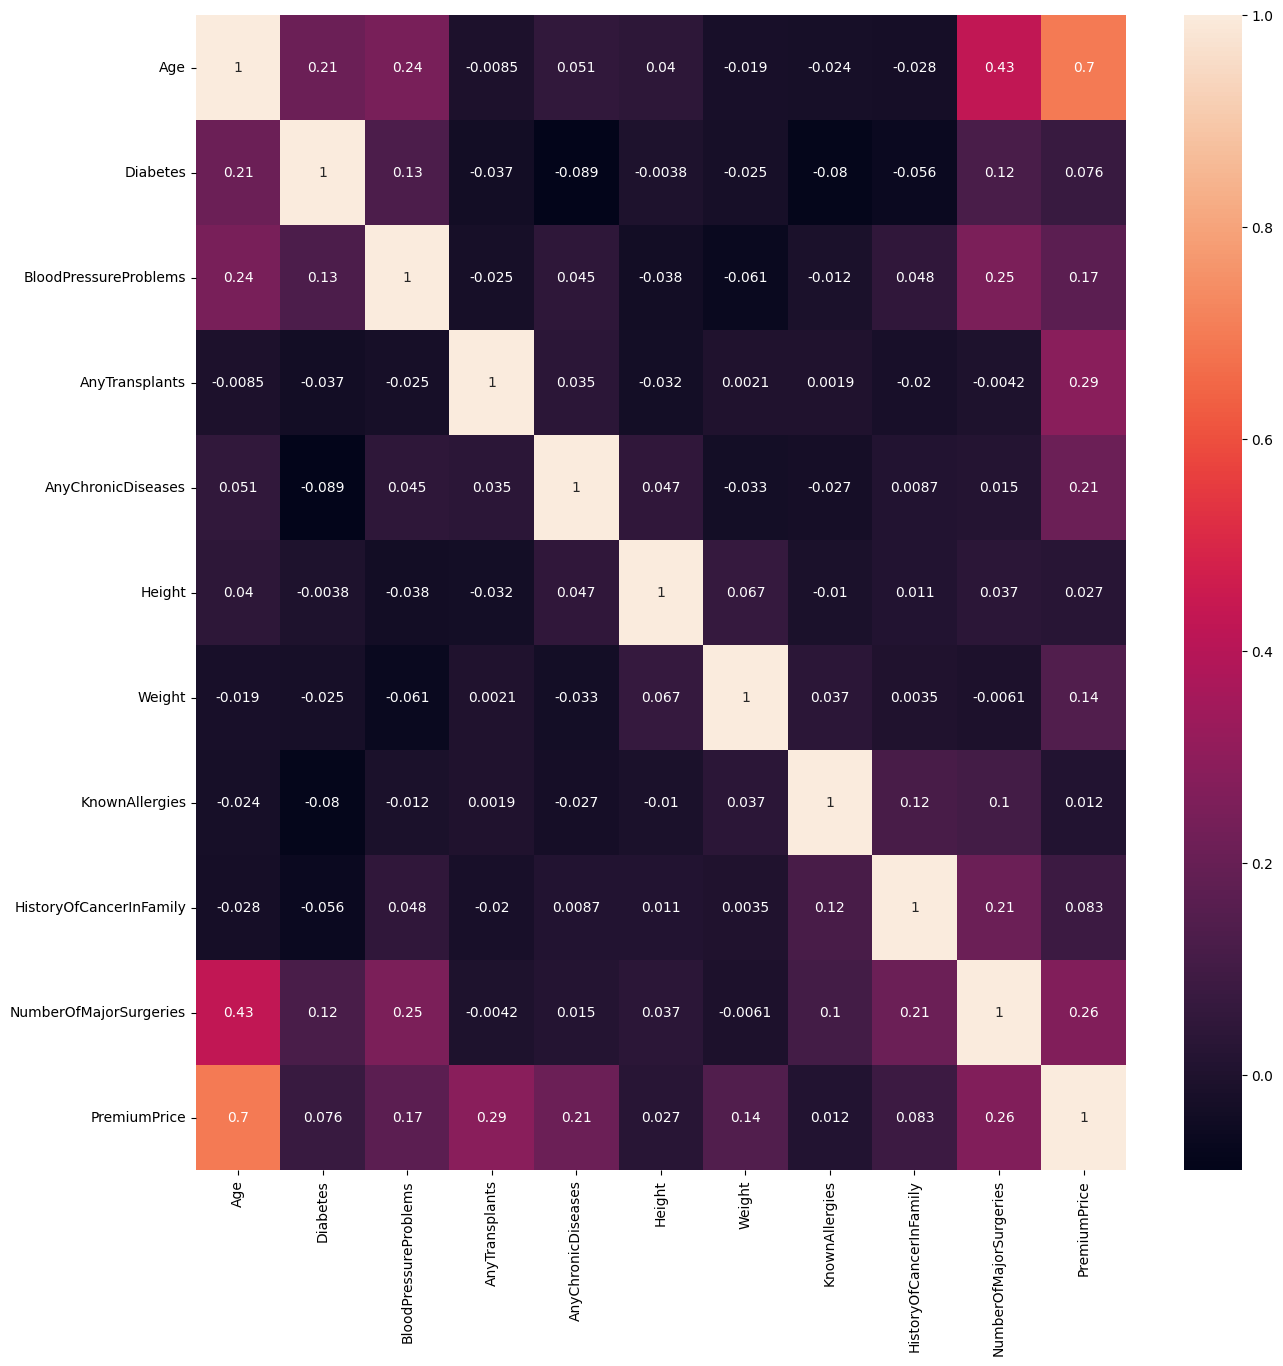

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

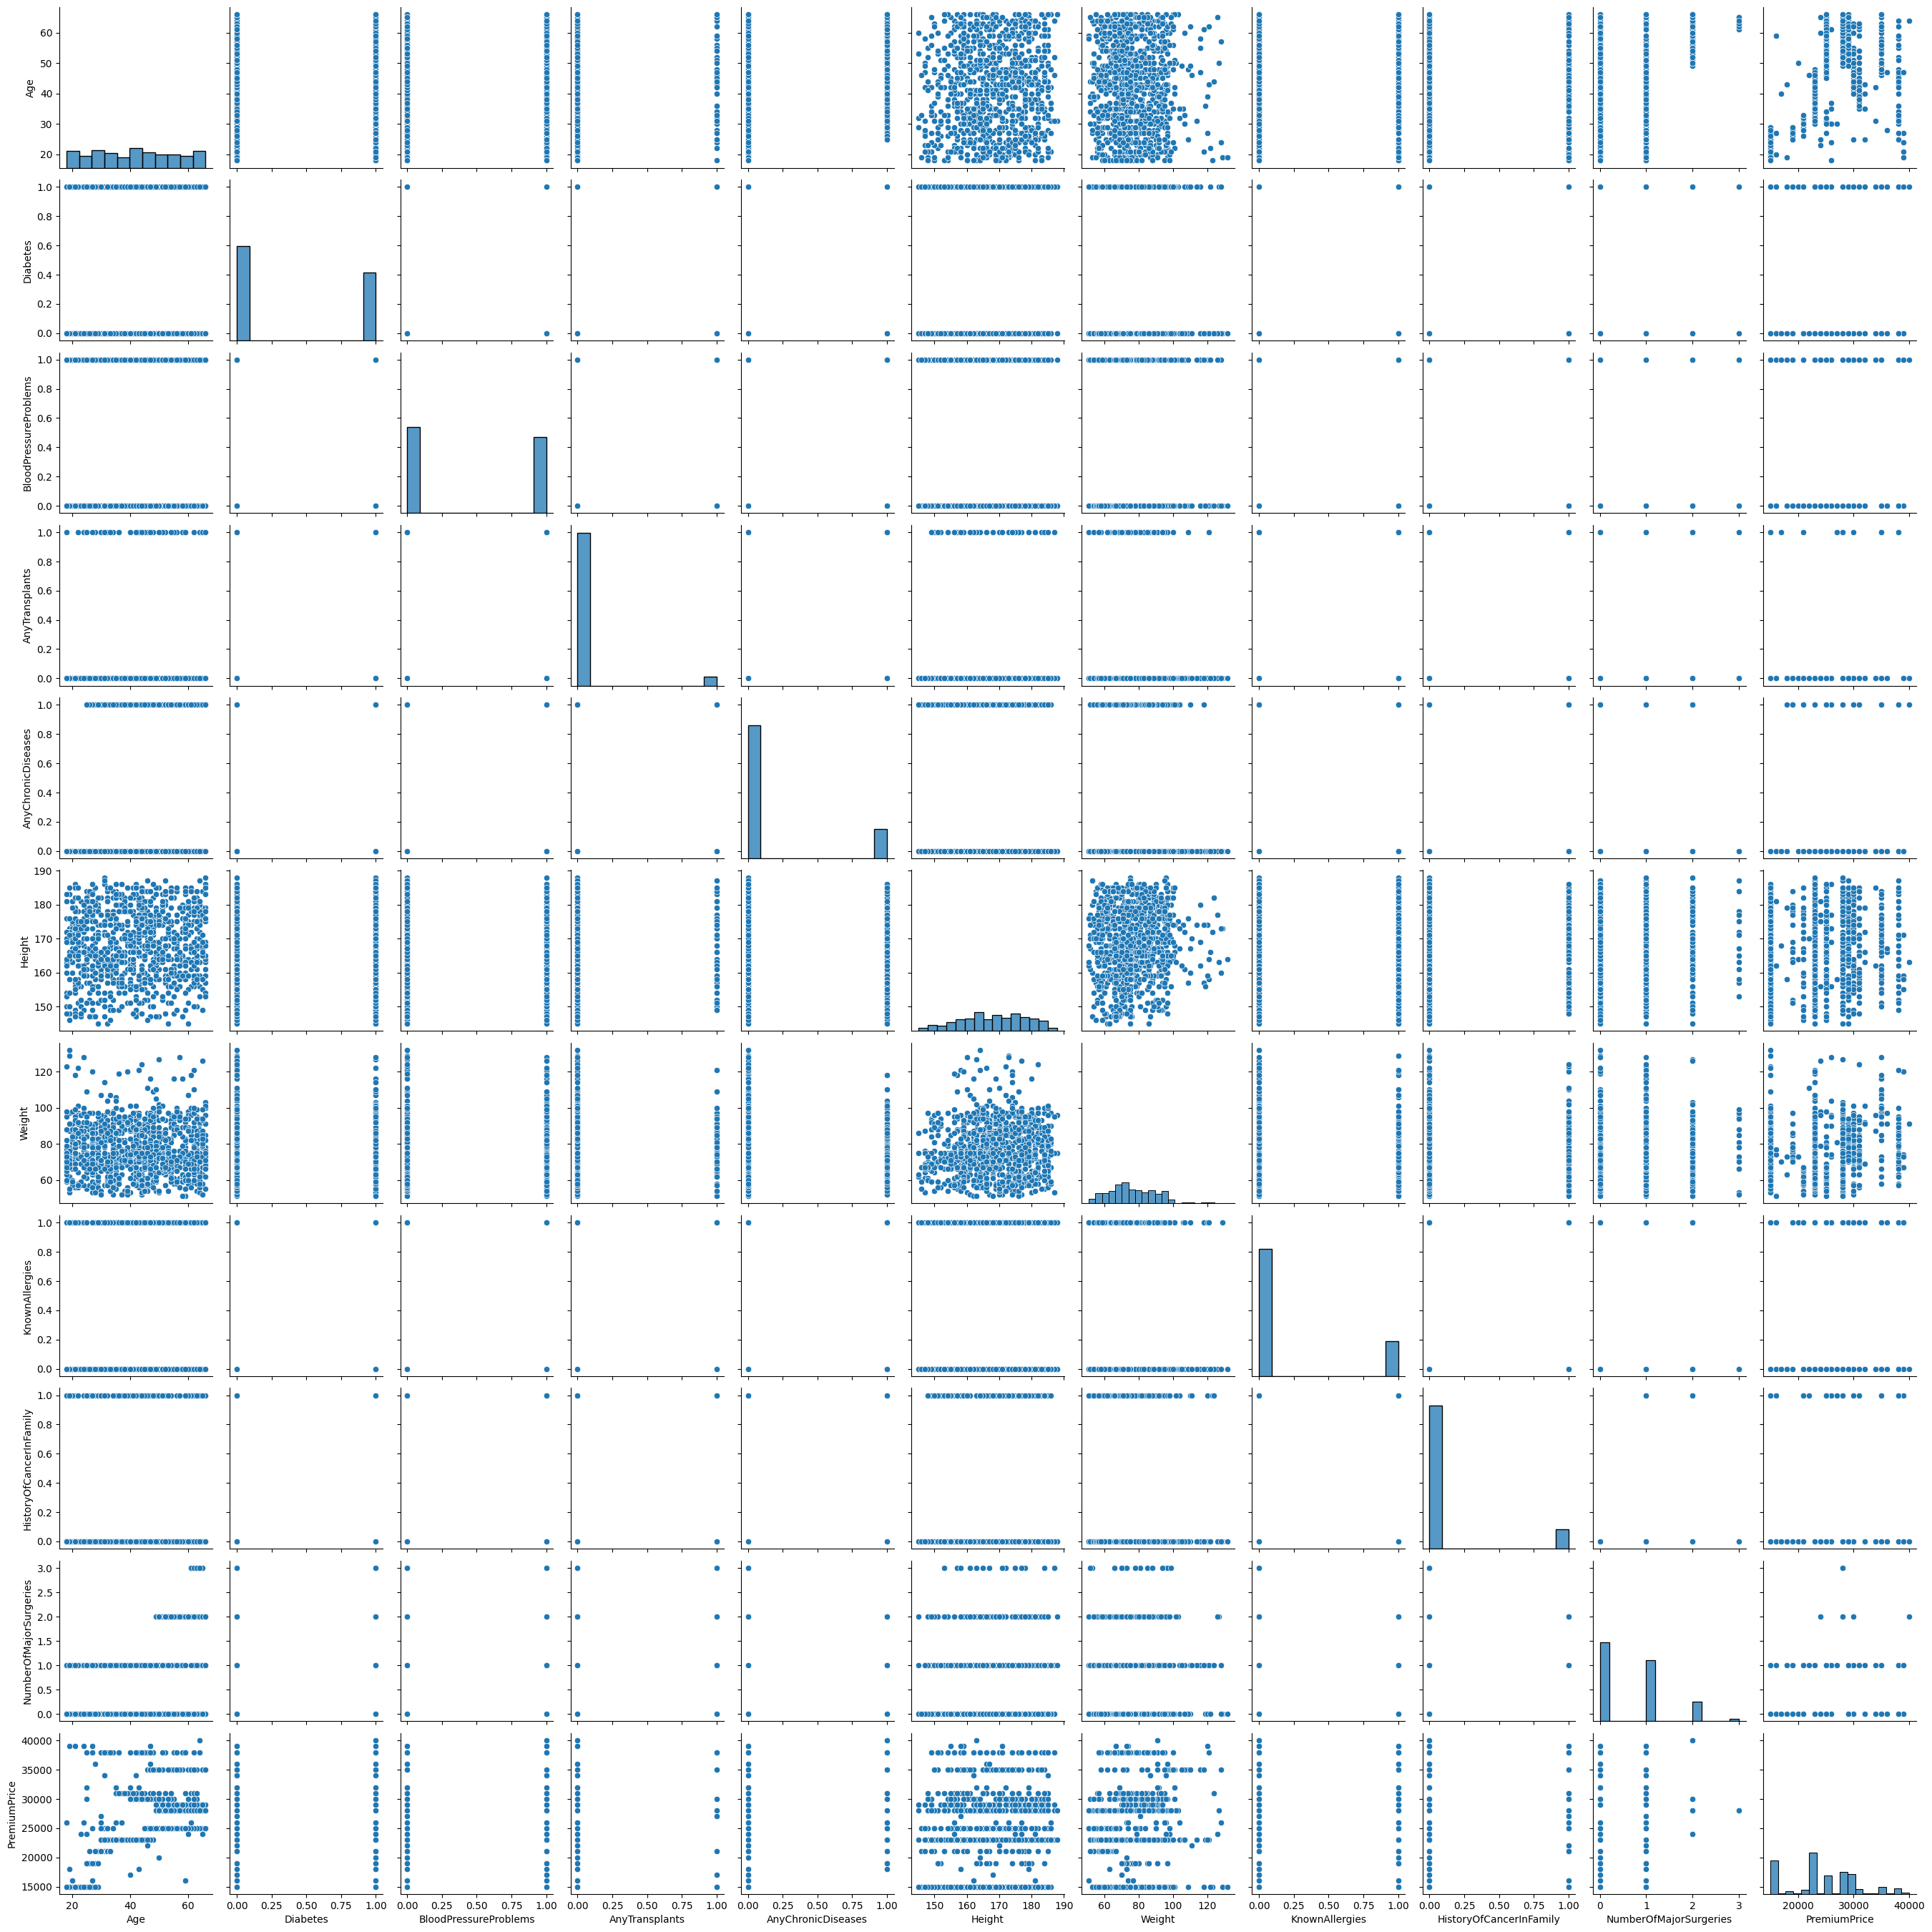

In [13]:
sns.pairplot(df)
plt.show()

In [14]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

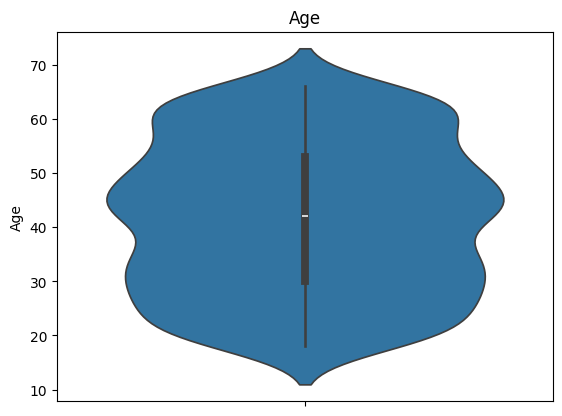

In [16]:
sns.violinplot(df['Age'])
plt.title('Age')
plt.show()

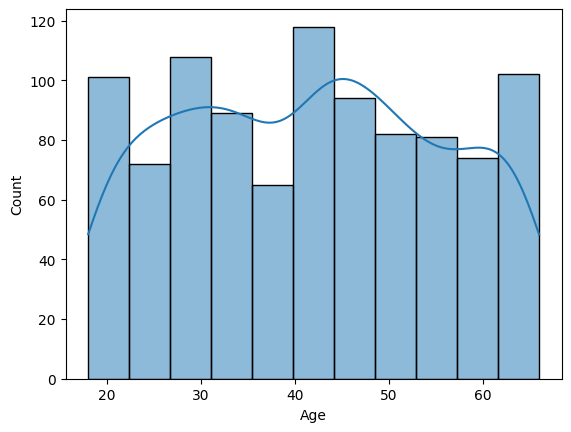

In [27]:
sns.histplot(df['Age'],kde=True)
plt.show()

In [21]:
df.head(5)

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [24]:
df.value_counts('Diabetes')

Diabetes
0    572
1    414
Name: count, dtype: int64

In [25]:
df.value_counts('BloodPressureProblems')

BloodPressureProblems
0    524
1    462
Name: count, dtype: int64

In [28]:
df.value_counts('AnyTransplants')

AnyTransplants
0    931
1     55
Name: count, dtype: int64

In [29]:
df.value_counts('AnyChronicDiseases')

AnyChronicDiseases
0    808
1    178
Name: count, dtype: int64

In [33]:
df.value_counts('KnownAllergies')

KnownAllergies
0    774
1    212
Name: count, dtype: int64

In [34]:
df.value_counts('HistoryOfCancerInFamily')

HistoryOfCancerInFamily
0    870
1    116
Name: count, dtype: int64

In [35]:
df.value_counts('NumberOfMajorSurgeries')

NumberOfMajorSurgeries
0    479
1    372
2    119
3     16
Name: count, dtype: int64

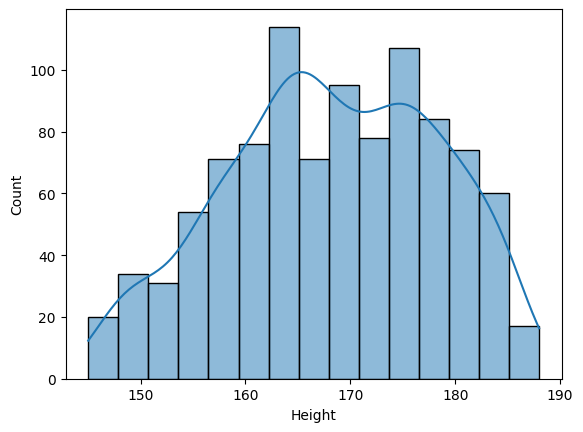

In [31]:
sns.histplot(df['Height'],kde=True)
plt.show()

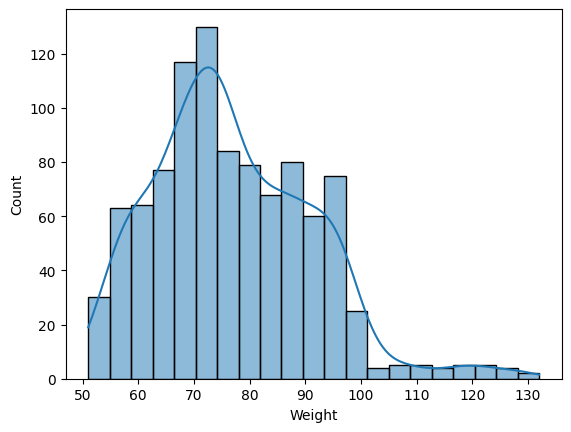

In [32]:
sns.histplot(df['Weight'],kde=True)
plt.show()

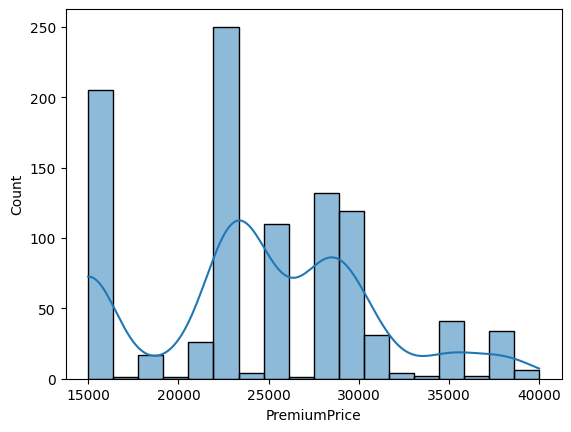

In [36]:
sns.histplot(df['PremiumPrice'],kde=True)
plt.show()

In [37]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [38]:
x = df[['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']]
y = df[['PremiumPrice']]

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [41]:
lr = LinearRegression()
dt = DecisionTreeClassifier()

In [43]:
lr.fit(x_train,y_train)

LinearRegression()

In [44]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [45]:
y_pred_lr = lr.predict(x_test)

In [46]:
y_pred_dt = dt.predict(x_test)

In [49]:
dic = {'Model':['Linear Regression','Decision Tree Classifier'],
      'Accuracy': [f'{int(r2_score(y_test,y_pred_lr)*100)} %',f'{int(r2_score(y_test,y_pred_dt)*100)} %']}

In [50]:
accuracy = pd.DataFrame(data=dic)

In [51]:
accuracy

,Model,Accuracy
0,Linear Regression,73 %
1,Decision Tree Classifier,51 %
